In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
from IPython.display import clear_output

In [3]:
from data_reader import DataReader 


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [4]:
r = DataReader(dataset = 'rooms_ring_camera', context_size = 5, root = '/home/ulrich/Downloads/train_data') #gets 4 views out of the rooms ring camera dataset

X = r.read(batch_size = 100) #batch_size = 12

def evaluate(tensor):
    with tf.train.SingularMonitoredSession() as sess: 
        out = sess.run(tensor)
    return out  

X_ = evaluate(X) # returns a named tuple ('TaskData', ['query', 'target'])

clear_output

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TFRecor

In [236]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [ ]:
#np.save('gqn_sample', X_)

In [202]:
type(X_) #datatype: collections.namedtuple('TaskData', ['query', 'target'])

data_reader.TaskData

In [204]:
query = X_[0] #datatype: collections.namedtuple('Query', ['context', 'query_camera'])
target = X_[1] #datatype: np.array. shape: batch_size, 64, 64, 3

In [226]:
#Example for query
context = query[0] # datatype: collections.namedtuple('Context', ['frames', 'cameras'])
query_camera = query[1]
print(type(context))
print(type(query_camera))

<class 'data_reader.Context'>
<class 'numpy.ndarray'>


In [242]:
#example Query Camera
query_camera[0]

array([-0.522382 , -0.8527117,  0.       ,  0.8527116,  0.5223819,
        0.       ,  1.       ], dtype=float32)

In [231]:
frames = context[0] #numpy array shape: batch_size, context_size, width, height, channels
cameras = context[1] #numpy array shape: batch_size, context_size, w: three-dimensional position, y: yaw, p: pitch
print(type(frames))
print(type(cameras))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


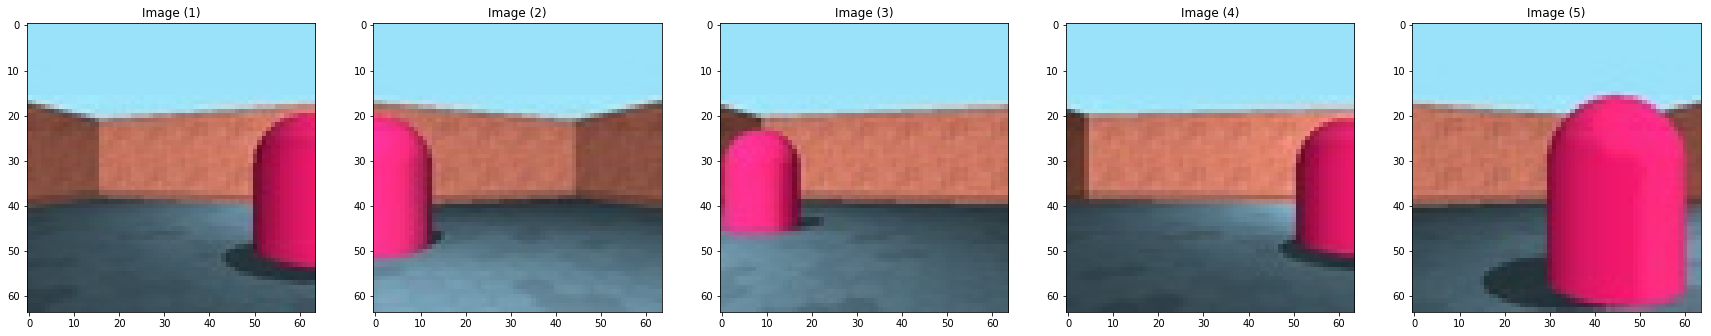

In [237]:
#example frames:
show_images(frames[0], titles)

In [241]:
#example cameras
cameras[0] # position for each frame

array([[-0.3888834 ,  0.92128694,  0.        , -0.9212869 ,  0.38888362,
         0.        ,  1.        ],
       [-0.46011972, -0.887857  ,  0.        ,  0.88785696,  0.46011955,
         0.        ,  1.        ],
       [ 0.24526015, -0.9694573 ,  0.        ,  0.96945727, -0.24526024,
         0.        ,  1.        ],
       [-0.14775905,  0.9890234 ,  0.        , -0.9890234 ,  0.14775902,
         0.        ,  1.        ],
       [-0.919335  ,  0.3934756 ,  0.        , -0.3934756 ,  0.91933507,
         0.        ,  1.        ]], dtype=float32)

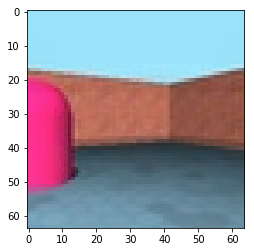

In [208]:
#Example for target: 
plt.imshow(target[0])

### viewpoints

$$\hat{v}^k = (w^k, cos(y^k), sin(y^k), cos(p^k), sin(p^k))$$ , where w: three-dimensional position, y: yaw, p: pitch

In [132]:
def get_position(view_points):
    """arg: tensor of size (batch_size, 7)
    returns: 
        - np.array position shape: (batch_size, xyz)
        - np.array yaw shape: (batch_size, 3)
        - np.array pitch shape: (batch_size, 3)
    """
    
    view_points[:, 3] = np.arccos(view_points[:, 3])
    view_points[:, 4] = np.arcsin(view_points[:, 4])
    #assert np.allclose(yaw1, yaw2)

    
    view_points[:, 5] = np.arccos(view_points[:, 5])
    view_points[:, 6] = np.arcsin(view_points[:, 6])
    #assert np.allclose(pitch1, pitch2)
    
    
    return view_points

In [133]:
positions = get_position(view_points)

In [51]:
query_full = query[0]

In [139]:
targets = query_full[0] # batch_size, context, images, width, height, channels
targets.shape

(12, 5, 64, 64, 3)

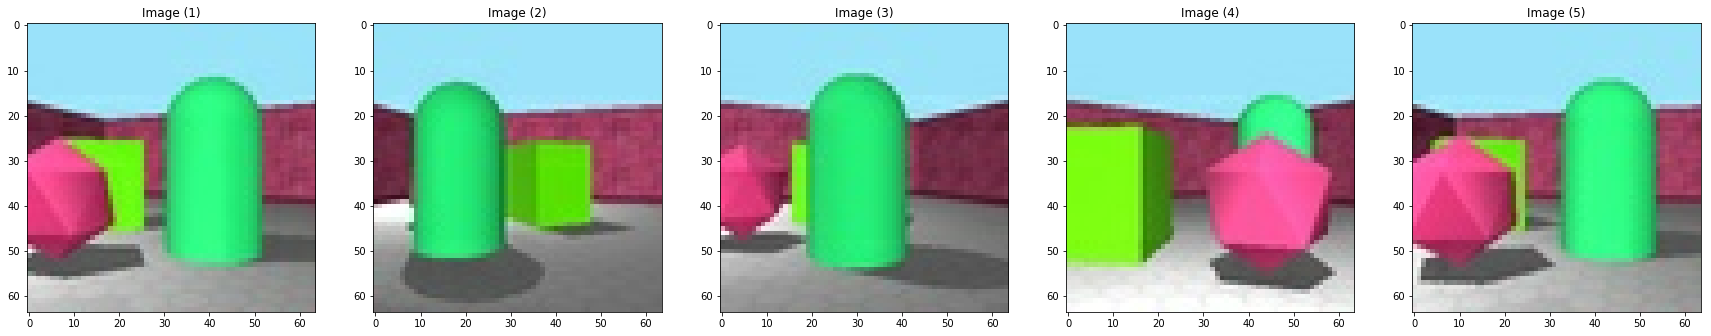

In [198]:
show_images(targets[3])